In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date, timedelta
from scipy.optimize import root_scalar


sns.set_style("darkgrid")

In [132]:
# r = 1.0
r = 0.04  # 10 Year T-Note.

# sigma = 0.02  # dt = 1
sigma = 0.3  # dt = 1/252

# Futures contract c. $10k
price = 78
multiplier = 100
commission_pc = 0.01 / 100

# Cost w/o margin.
cost = price * multiplier
c_per_trade = cost * commission_pc
c_per_trade

0.78

In [133]:
# (Entry, Exit) * (Long Leg, Short Leg)
num_trades = 4
c = num_trades * c_per_trade
c

3.12

In [134]:
b_opt = c + sigma/np.sqrt(2*r)
b_opt

4.180660171779821

In [135]:
alpha = np.sqrt(2*r)/sigma
beta = alpha*c + 1


def objective(d):
    # return 2*np.exp(alpha*(d - c) - 1) - alpha*d - beta
    return np.log(0.5*(alpha*d+beta)) - alpha*d + beta


# Initial guesses
d0 = 1
d1 = 1.1
res = root_scalar(f=objective, x0=d0, x1=d1)


print(f"Exit: {b_opt}, Entry: {res.root}")

Exit: 4.180660171779821, Entry: 5.825965503291157


In [127]:
dt = 1/252

dt, 0.02/0.3

(0.003968253968253968, 0.06666666666666667)

# Plots

In [146]:
obj = np.log(0.5*(alpha*d+beta)) - alpha*d + beta

Text(0.5, 0, 'd')

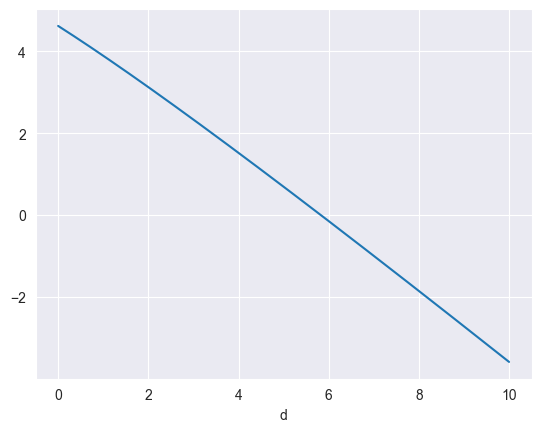

In [147]:
d = np.linspace(0, 10, 1001)

alpha = np.sqrt(2*r)/sigma
beta = alpha*c + 1

plt.plot(d, obj)
plt.xlabel("d")
plt.ylabel("Obj")

/var/folders/2v/xw5v0n3d5rlf442fyyzb04dc0000gn/T/ipykernel_1585/3185282337.py:4: RuntimeWarning: divide by zero encountered in divide
  alpha = np.sqrt(2*r)/sigma


Text(0, 0.5, 'Obj')

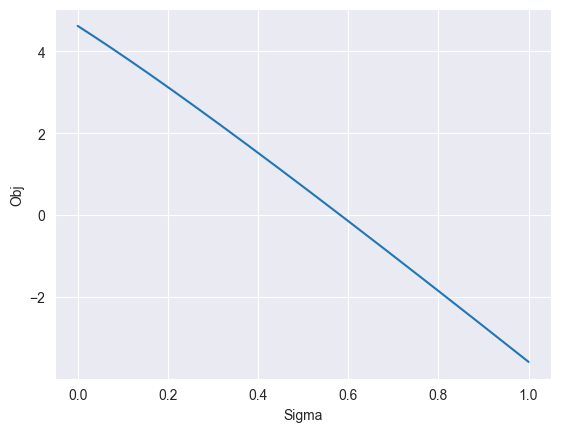

In [150]:
d = 5.82
sigma = np.linspace(0, 1, 1001)

alpha = np.sqrt(2*r)/sigma
beta = alpha*c + 1

plt.plot(sigma, obj)
plt.xlabel("Sigma")
plt.ylabel("Obj")

Text(0, 0.5, 'Obj')

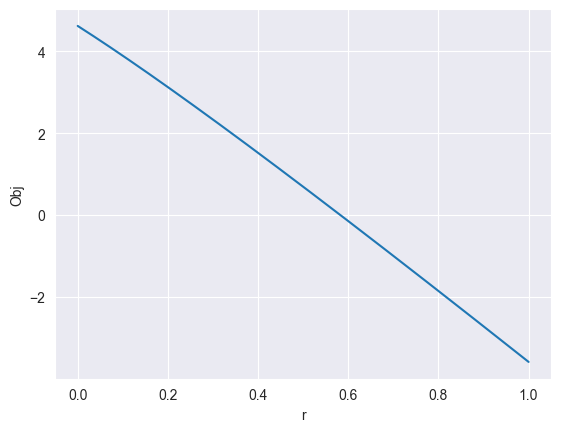

In [151]:
d = 5.82
sigma = 0.56
r = np.linspace(0, 1, 1001)

alpha = np.sqrt(2*r)/sigma
beta = alpha*c + 1

plt.plot(r, obj)
plt.xlabel("r")
plt.ylabel("Obj")